C:\Users\uctpttl\AppData\Local\Temp\ipykernel_23196\3746689817.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  portfolios_data = pd.read_csv(r'C:\Users\uctpttl\MSIN0208\Tutorial 1\data\portfolios.csv', index_col=0, parse_dates=True)


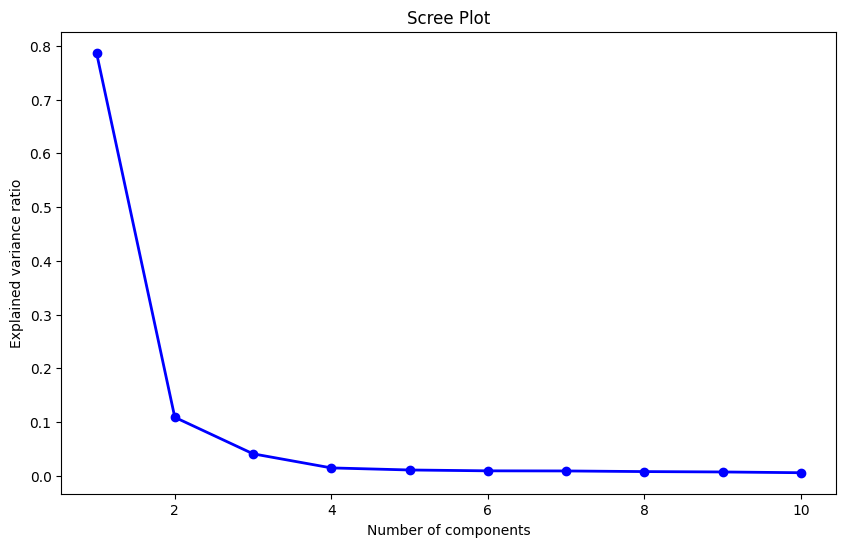

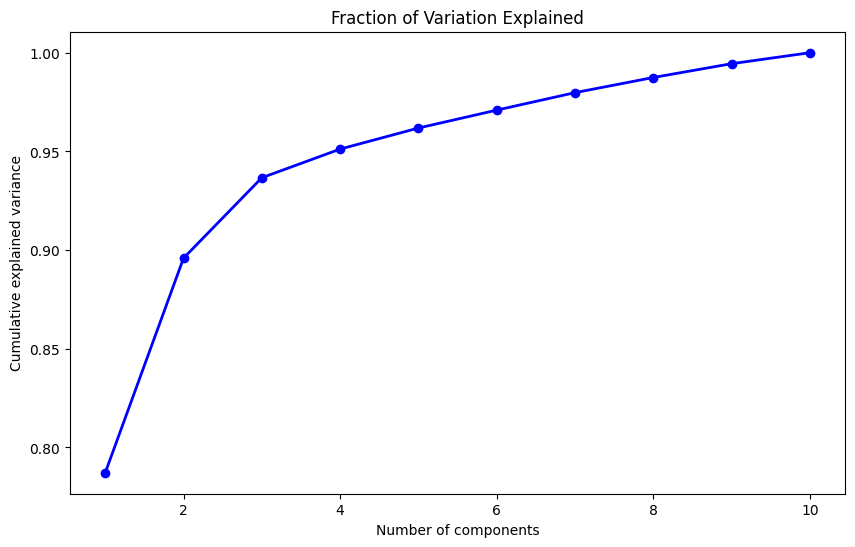

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# (a) Load data and perform PCA
portfolios_data = pd.read_csv(r'C:\Users\uctpttl\MSIN0208\Tutorial 1\data\portfolios.csv', index_col=0, parse_dates=True)
portfolios_data = portfolios_data.loc['199001':'201912']

# Standardize the portfolio data
portfolios_scaled = (portfolios_data - portfolios_data.mean()) / portfolios_data.std()

# Perform SVD on the standardized portfolio data
U, S, Vh = np.linalg.svd(portfolios_scaled, full_matrices=False)
pc1 = U[:, 0]

# Explained variance ratio
explained_variance_ratio = (S ** 2) / (S ** 2).sum()

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), explained_variance_ratio[:10], 'bo-', linewidth=2)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Scree Plot')
plt.show()

# Fraction of variation explained
cumulative_var_exp = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), cumulative_var_exp[:10], 'bo-', linewidth=2)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Fraction of Variation Explained')
plt.show()

C:\Users\uctpttl\AppData\Local\Temp\ipykernel_23196\1534696931.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  returns_data = pd.read_csv(r'C:\Users\uctpttl\MSIN0208\Tutorial 1\data\returns.csv', index_col=0, parse_dates=True)


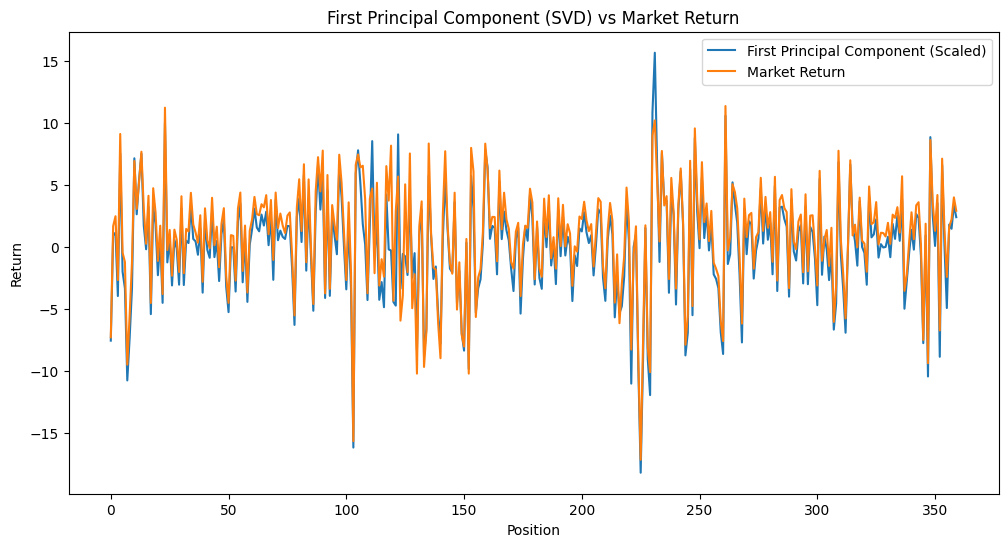

Correlation between Scaled First Principal Component and Market Return: 0.97


In [3]:
# b
# Load the returns.csv file
returns_data = pd.read_csv(r'C:\Users\uctpttl\MSIN0208\Tutorial 1\data\returns.csv', index_col=0, parse_dates=True)

# Extract the market return and risk-free rate from the returns.csv file
market_return = returns_data['Mkt-RF'] + returns_data['RF']
risk_free_rate = returns_data['RF']

# Align the dates of the first principal component and market return
common_dates = portfolios_data.index.intersection(market_return.index)
pc1_aligned = pd.Series(pc1, index=portfolios_data.index).loc[common_dates]
market_return_aligned = market_return.loc[common_dates]

# Calculate the scaling factor
scaling_factor = market_return_aligned.std() / pc1_aligned.std()

# Scale the first principal component
pc1_scaled = pc1_aligned * scaling_factor

# Create index based on the position in the vector
index = np.arange(len(pc1_scaled))

# Plot the scaled first principal component and market return
plt.figure(figsize=(12, 6))
plt.plot(index, pc1_scaled, label='First Principal Component (Scaled)')
plt.plot(index, market_return_aligned, label='Market Return')
plt.xlabel('Position')
plt.ylabel('Return')
plt.title('First Principal Component (SVD) vs Market Return')
plt.legend()
plt.show()

# Calculate the correlation between the scaled first principal component and market return
correlation = np.corrcoef(pc1_scaled, market_return_aligned)[0, 1]
print(f"Correlation between Scaled First Principal Component and Market Return: {correlation:.2f}")

The first principal component (PC1) obtained from the PCA on the 10 portfolios sorted by momentum has a (high) correlation of 0.97  the scaled market return. This suggests that the first principal component captures a significant portion of the variation in the market return.
The high correlation implies that the first principal component is closely related to the "market" factor, In other words, the first principal component seems to be capturing the systematic risk that is common across the 10 momentum portfolios.
CAPM would say that the expected return of an asset is determined by its beta (the asset's sensitivity to the market risk factor).
This finding is consistent with the idea that the market factor is the dominant source of systematic risk in asset returns.

(c) Consider the "fraction explained" plot from part (a)

Fraction of variation explained with 10 principal components}
The singular value decomposition (SVD) of the standardized portfolio returns matrix $X$ can be expressed as:
\begin{equation}
A = U S V^T
\end{equation}
where $U$ and $V$ are orthogonal matrices, and S is a diagonal matrix containing the singular values $s_i$ in descending order.
The rank of a matrix is the maximum number of linearly independent rows or columns. In the case of the returns matrix A, which has dimensions 10 × 360 (n × m), the maximum possible rank is $min(n, m) = 10$.
Since the returns matrix A has a maximum possible rank of 10, there can be at most 10 non-zero singular values. Each non-zero singular value corresponds to a principal component that explains a portion of the variation in the data.
When we compute the SVD of the returns matrix A, we obtain 10 non-zero singular values, each associated with a principal component. These 10 principal components collectively explain 100% of the variation in the data.
In other words, the 10 principal components span the entire space of the returns matrix A. By projecting the data onto these 10 principal components, we can perfectly reconstruct the original returns matrix A without any loss of information.

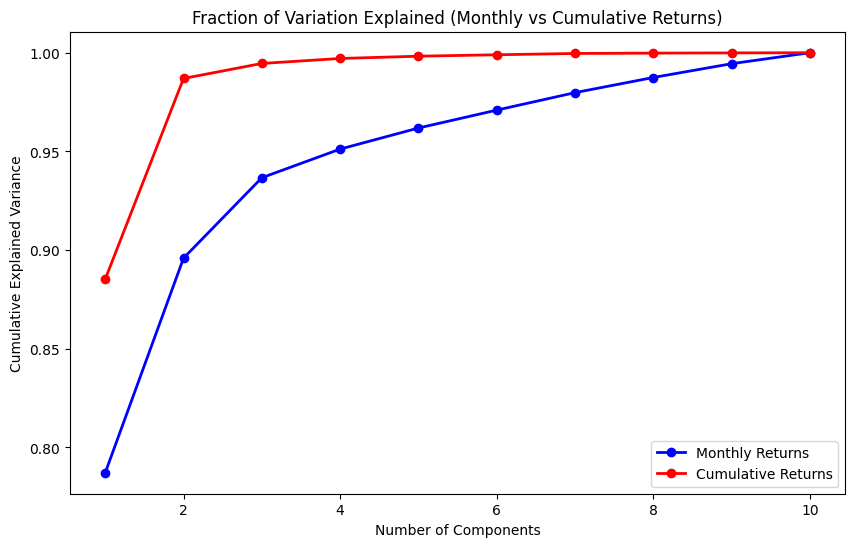

In [4]:
# (d) Convert monthly returns to cumulative returns
returns_scaled = portfolios_data / 100
log_returns = np.log(1 + returns_scaled)
cumulative_returns = np.exp(log_returns.cumsum()) - 1

# Standardize the cumulative returns
scaler_cumulative = StandardScaler()
cumulative_returns_scaled = scaler_cumulative.fit_transform(cumulative_returns)

# Perform SVD on the standardized cumulative returns
U_cumulative, S_cumulative, Vh_cumulative = np.linalg.svd(cumulative_returns_scaled, full_matrices=False)

# Explained variance ratio for cumulative returns
explained_variance_ratio_cumulative = (S_cumulative ** 2) / (S_cumulative ** 2).sum()

# Fraction of variation explained for cumulative returns
cumulative_var_exp_cumulative = np.cumsum(explained_variance_ratio_cumulative)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), cumulative_var_exp[:10], 'bo-', linewidth=2, label='Monthly Returns')
plt.plot(range(1, 11), cumulative_var_exp_cumulative[:10], 'ro-', linewidth=2, label='Cumulative Returns')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Fraction of Variation Explained (Monthly vs Cumulative Returns)')
plt.legend()
plt.show()

One potential explanation for why the proportion of explained variance is higher with cumulative returns(you may think of more), could be that when we take cumulative returns, we strip out some of the higher frequency idiosyncratic variation in returns. This would allow the long-term trends to be more easily captured by the principal components. The higher proportion of variance suggests that these components are better able to capture the essential long-term dynamics of the portfolio returns - though note that the monthly returns still do well.
It may help to think of this in association with the discussion in part b about the market factor

1e)To find the number of elements needed to store the best rank-2 approximation A₂, we can use the truncated SVD formula:
A₂ = U₂ S₂ V₂'
where:
U₂ is an m × 2 matrix containing the first two left singular vectors.
S₂ is a 2 × 2 diagonal matrix containing the first two singular values.
V₂ is an n × 2 matrix containing the first two right singular vectors.
U₂: The matrix U₂ has dimensions m × 2, so it requires storing m × 2 = 360 × 2 = 720 elements.
S₂: The diagonal matrix S₂ has dimensions 2 × 2, but since it is diagonal, we only need to store the two singular values. Therefore, S₂ requires storing 2 elements.
V₂: The matrix V₂ has dimensions n × 2, so it requires storing n × 2 = 10 × 2 = 20 elements.
In total, the number of elements needed to store the best rank-2 approximation A₂ is:
Number of elements = Elements in U₂ + Elements in S₂ + Elements in V₂
= 720 + 2 + 20
= 742